# Linear Algebra - Gaussian elimination
I write a function named `gaussian_elimination` which accepts an input square matrix $A$, of size $N\times N$, and applies elementary row operations to $A$ to obtain a lower triangular matrix.

However I first write a function named `eliminate_super_diagonal` which accepts two input arguments

1. an $N \times N$ real (floating point) matrix $A$ for which $A_{j + 1,j + 1} \ne 0$, with $N \ge 1$,
2. an index $j$, where $j \in \left\{ 0, \ldots, N - 1 \right\}$,

and applies elementary row operations to eliminate all entries above the main diagonal in the $\left( j + 1 \right)$th column of $A$ (here the rows and columns of $A$ are referred to indexing from *one*).

That is, on returning from the function, all elements in $A$ from row $\left( j + 1 \right)$ to row $N$ should be left unchanged, while elementary row operations are applied so that, on returning from the function, $A_{k,j + 1} = 0$ for all $k < j + 1$.

In [2]:
import numpy as np

def eliminate_super_diagonal(A,j):
    N=A.shape[0]                                 #extracting size of matrix to be used in the for loop 
    for i in range(j):                           #loop for accessing rows of the given matrix from the first row up to 
                                                 #the one just above row j 
        for k in range(N):                       #loop for acessing every element in a given row
            A[i,k]=A[i,k]-A[j,k]*(A[i,j]/A[j,j]) #performing a combination of elementary row operations 
                                                 #on every element that will make element j==0.
    return A

def gaussian_elimination(A):
    N=A.shape[0]                                 #extracting size of matrix to be used in for loops
    h=np.zeros([2,N])                            #creating an empty matrix to use as storage later
    for l in range(N-1,0,-1):                    #going through every row of the matrix starting from the last one,... 
                                                 #in order to access all elements on the diagonal
        if A[l,l]!=0:                            #checking if the jth element is 0 as to avoid division by 0
            eliminate_super_diagonal(A,l)        #applying the function making all elements above a non-zero element... 
                                                 #on the diagonal ==0
        else:                                    #if element on the diagonal is 0
            for m in range(l,-1,-1):             #a loop to go trough all the rows above the current one
                if A[m,l]!=0:                    #in case there is a row with a non-zero element above the current one,... 
                                                 #we want to swap the two
                    h[0,:]=A[l,:]                #storing the row with the zero jth element(i.e. the jth row)... 
                                                 #into an empty array
                    A[l,:]=A[m,:]                #storing the row with the non-zero element into the jth row,...
                                                 #i.e. the jth row now has a non-zero jth element
                    A[m,:]=h[0,:]                #storing the row with the zero jth element(i.e. the original jth row)...
                                                 #into the current, i.e. the swap is complete and no information is lost
                    A=eliminate_super_diagonal(A,l)
                                                 #the jth element is now non-zero so we can run the function...
                                                 #and make all elements above it 0
                    break                        #want to exit as soon as we find a non-zero row as to avoid...
                                                 #swapping with lots of non-zero jth element rows,...
                                                 #although all elements should now be zero anyway  
                                                 #if all elements above are equal to zero no need to run the function,...
                                                 #already done!
    return(A)

Note: I have accounted for an element on the diagonal being 0 by looking for a row above with a non-zero element in the same column and swapping the two rows, which is an elementary row operation and so preserves the integrity of the matrix. This would make the element on the diagonal now non-zero and hence perfectly alright to carry on with, using the function `eliminate_super_diagonal`.

# Investigating cost
How does the cost of `gaussian_elimination` increase as $N$ increases? I carry out a numerical test and discuss.

<IPython.core.display.Javascript object>


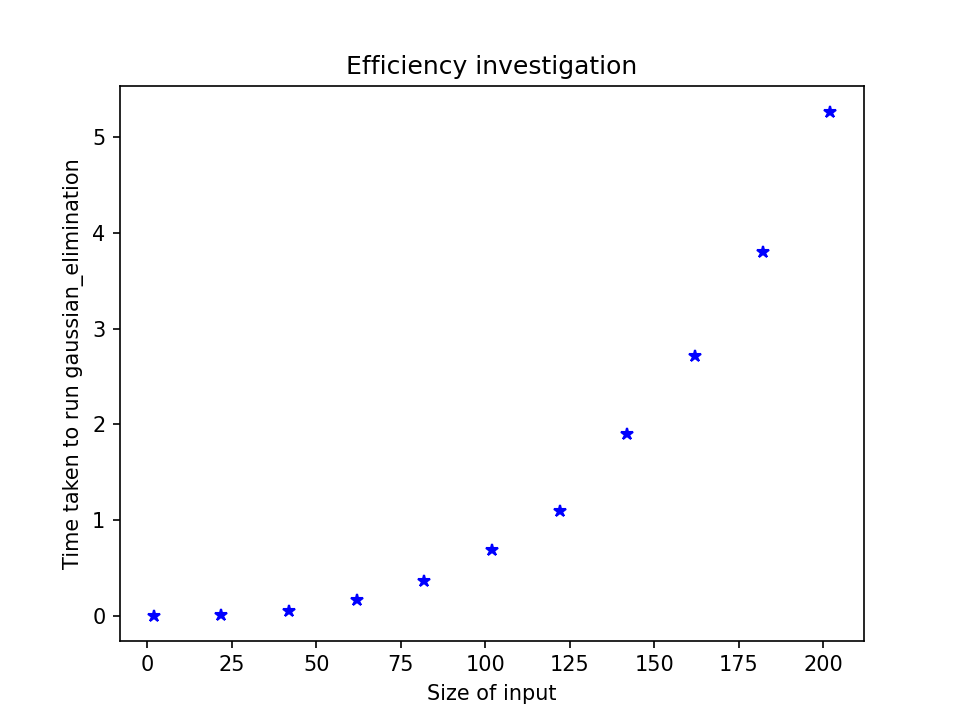

<function matplotlib.pyplot.show(*args, **kw)>

In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import time
f=([])                                            #creating empty lists to store efficiency investigation data into
x=([])

for i in range(2,203,20):                         #increasing for loop so we can run and time the function...
                                                  #for different sized square matrices
    A = np.random.random([i, i])                  #creating a random matrix to be used in the investigation
    t0 = time.time()                              #starting the timer
    gaussian_elimination(A)                       #running the function
    t = time.time() - t0                          #stopping the timer
    f.append(t)                                   #storing the time taken in the array of data
    x.append(i)                                   #storing the size of matrix in the array of data
plt.plot(x,f,"b*")                                #plotting a scatter graph of the data to visualize...
                                                  #how efficiency of the function changes with increase in size of input
plt.title("Efficiency investigation")
plt.xlabel("Size of input")
plt.ylabel("Time taken to run gaussian_elimination")
                                                  #presenting investigation results
plt.show

# A discussion
I have run my `gaussian_elimination` function for different cases using a for loop and recorded the results in a list in order to plot them against each other for a visual representation of cost increase versus size of input. I interpreted cost to be time taken to run the function and used the time library to time how long the function takes to run for different sized random square matrices. Making the values within the matrices random may also ensure a uniform cost of individual operations within a matrix, e.g. an all zeros matrix is likely to take less time to be processed. The exponential relationship is not a surprising result, increasing the size of the matrix, increases the no. of operations in my code by at least the square of the factor.